## Observations and Insights 

In [299]:
%matplotlib notebook

In [300]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [301]:
# take a look at both dfs to see where to merge
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [302]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [303]:
# Combine the data into a single dataset
# if you did this: (mouse_metadata, study_results, how="left", "on=["Mouse ID", "Mouse ID"])
merged_df=pd.merge(mouse_metadata, study_results)
# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [304]:
# Checking the number of data values.
merged_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [305]:
# Checking the number of total mice.
tot_mice=len(merged_df.loc[:, 'Mouse ID'].unique())
tot_mice

249

In [306]:
merged_df.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [307]:
# # sort df by mouse ID, then use that new df to drop duplicates in timepoint column. 
# # do I need to reset the index? 
# id_df=merged_df.sort_values('Mouse ID')
# id_df

In [308]:
# # drop dupliates and return a copy-> but I want to keep the dupliates in another container
# id_df.drop_duplicates('Timepoint', inplace=False)
# id_df.count()

In [309]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# id_df.duplicated('Timepoint')
# Try this to drop duplicates - don't like this because it looks for unique values in Timepoint but doesn't sort thorugh mouse ID
# cleaned_df=id_df.drop_duplicates(subset=['Timepoint'], inplace=False)
# cleaned_df.head(20

# id_df.drop_duplicates(subset="Mouse ID")["Mouse ID"].count()
# So I think that this drops only the duplicates if they have the same mouse ID AND timepoint. 
# cleaned_df=id_df.drop_duplicates(['Mouse ID', 'Timepoint'])
# cleaned_df.count()

In [310]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# ??How come groupby doesn't work on this? 
# merged_df.groupby('Mouse ID').count('Timepoint'])
# example: id_df.loc

In [311]:
# Optional: Get all the data for the duplicate mouse ID. 
# ?? this returns a list of boolean values, where false means that there is not a duplicate. 
duplicated_id=merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID']

duplicated_id
# filter_mouse.groupby(by=False)



909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [312]:
# Optional: Get all the data for the duplicate mouse ID. 
# now I can use this id to show me all the data from original dataframe with this mouse ID, and pull it
filter_1=merged_df.loc[:, 'Mouse ID']== 'g989'
dropped_data_df=merged_df.loc[filter_1, :]
dropped_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [313]:

# # ?? this returns a list of boolean values, where false means that there is not a duplicate. 
# duplicated_id=id_df.loc[id_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()

# pd.DataFrame({'Mouse ID': duplicated_id})

# # filter_mouse.groupby(by=False)

# # now I can use this id to show me all the data from original dataframe with this mouse ID using .loc, and pull it

In [314]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID., also resets index of DF
# use .loc to create a new df pulling all the dolumns where mouse ide does not equal the mouse id above 
# cleaned_df=cleaned_df.reset_index(drop=True)



In [315]:
# create a clean dataframe by only including from the original mice whose id does not equal g989
# try this on both merged_df and id_df (sorted by mouse id)
filter_2=merged_df.loc[:, 'Mouse ID']!='g989'
merged_df_clean=merged_df.loc[filter_2, :]
merged_df_clean.count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

In [316]:
merged_df_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [187]:
# # Same as above, but this id_df has been sorted by Mouse ID prior to using.
# # Probably best to do without sorting values prior, to keep as close as possible to original data?
# filter_3=id_df.loc[:, 'Mouse ID']!='g989'
# id_df_clean=id_df.loc[filter_2, :]
# id_df_clean.head()

In [188]:
# Checking the number of mice in the clean DataFrame. ->need to count unique vaules in mouse ID
# len(cleaned_df.loc[:, 'Mouse ID'].unique())

tot_mice_clean=merged_df_clean.loc[:, 'Mouse ID'].nunique()
tot_mice_clean

248

## Summary Statistics

In [189]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
merged_df_clean.describe()


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,12.757979,25.660106,19.606383,50.435293,1.025000
std,7.181998,3.935064,14.094238,8.914197,1.139971
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.933454,1.000000
75%,19.250000,29.000000,30.000000,56.324075,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [190]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# you can acess a specific column of .groupby object by: cleaned_df.groupby('Drug Regimen')['Tumor Volume']
drug_df=merged_df_clean.groupby('Drug Regimen')
drug_df.count()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [191]:
type(drug_df.count())


pandas.core.frame.DataFrame

In [192]:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# think aboutwhat would be different: drug_df.mean()['Tumor Volume'] -> does the mean on all columns, then pulls value from this column only 
tv_mean=drug_df['Tumor Volume (mm3)'].mean()
tv_median=drug_df['Tumor Volume (mm3)'].median()
tv_var=drug_df['Tumor Volume (mm3)'].var()
tv_std=drug_df['Tumor Volume (mm3)'].std()
tv_sem=drug_df['Tumor Volume (mm3)'].sem()

In [193]:
# Assemble the resulting series into a single summary dataframe.
new_columns={
    "Mean Tumor Volume": tv_mean,
    "Median Tumor Volume": tv_median,
    "Variance": tv_var,
    "Standard Deviation": tv_std,
    "Standard Error of Mean": tv_sem
}

drug_summary_df=pd.DataFrame(new_columns)

In [194]:
drug_summary_df

,Mean Tumor Volume,Median Tumor Volume,Variance,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [195]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary_df=merged_df_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

print(type(merged_df_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])))
# also tried: drug_df.agg, but it didn't like that for a groupby object

agg_summary_df

<class 'pandas.core.frame.DataFrame'>


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [196]:
new_columns={
    "mean":"Mean Tumor Volume",
    "median": "Median Tumor Volume",
    "var": "Variance",
    "std": "Standard Deviation",
    "sem": "Standard Error of Mean"
}

# Rename columns
agg_summary_df.rename(columns=new_columns)

,Mean Tumor Volume,Median Tumor Volume,Variance,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [197]:
# this is a series
type(drug_df.count()['Mouse ID'])
drug_count=drug_df.count()['Mouse ID']
drug_count

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [198]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
# use drug_df (groupby object), but .count makes it a df, and only acess one of the columns is fine. 
# drug_df.count()

# drug_df.count().plot(kind='bar')

# it's better not to do this, but to access only one of the columns initially because it's less
# work for the computer

<IPython.core.display.Javascript object>


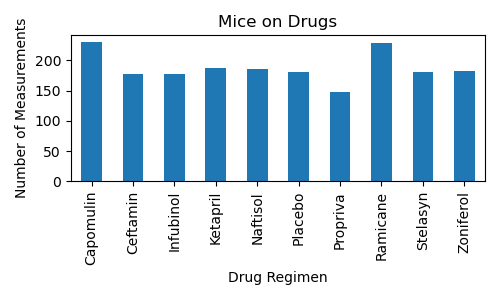

In [199]:
# ax = 
drug_count.plot(kind='bar', figsize=(5, 3), ylabel='Number of Measurements', title='Mice on Drugs')
plt.tight_layout()

# below was tyring versions of labelling axes and title with pd.plot 
# -> based on documentation, I put in the .plot phrase
    # x_label='Drug Regimen'
    # y_label='Number of Measurements'

    # ax.set_xlabel(x_label)
    # ax.set_ylabel(y_label)

In [200]:
# drug_df.count().plot(y='Mouse ID',kind='bar', figsize=(5, 3))
# # .plot.bar(x='label', y='label')

In [201]:
# is this all pyplot and not pandas? ->
# # set a title for the chart
# plt.title('Mice Take Drugs')
# plt.xlabel('Drug Regimen')
# plt.ylabel('Number of Measurements')
# plt.show()
# plt.tight_layout()

In [202]:
# I did this earlier as a work around, but in cell above was able to do the same thing using .plot's arguments in one step
# drug_count_df=drug_df.count()
# drug_count_df=pd.DataFrame(drug_count_df.loc[:, 'Mouse ID'])
# drug_count_df.plot(kind='bar')

In [203]:
# drug_df['Mouse ID'].plt()

In [204]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# set x axis
# number of ticks is the range that is composed of a list the length of unique values of drug regimen
# -> how many unique drug regimens are there? 10. Need a range of 10.

x_axis=np.arange(len(merged_df_clean.loc[:, "Drug Regimen"].unique()))

y_axis=drug_count

# # set tick locations
tick_locations = [value for value in x_axis]

In [217]:
# # create bar chart
plt.figure(figsize=(10, 6))
plt.bar(x_axis, y_axis, color='g', edgecolor='k', alpha=0.75, align='center')
plt.xticks(tick_locations, merged_df_clean['Drug Regimen'].unique(), rotation='vertical')

# set x and y limits
plt.xlim(-1, len(x_axis))
plt.ylim(0, max(drug_count)+50)

# set title, labels
plt.title('Mice on Drugs using Pyplot')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurements')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

In [206]:
merged_df_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [207]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


# pull 2 columns from orginal df and groupby sex, then .count to get count of male/female mice
# assign to variable
sex_count_df=merged_df_clean[['Mouse ID', 'Sex']].groupby('Sex').count()
sex_count_df

,Mouse ID
Sex,
Female,922
Male,958


In [208]:
new_columns={
    "Mouse ID":"Number of Mice"
}

sex_count_df_renamed=sex_count_df.rename(columns=new_columns)

In [212]:
# create pie chart using df above
sex_count_df_renamed.plot(y='Number of Mice', x='Sex', kind='pie')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


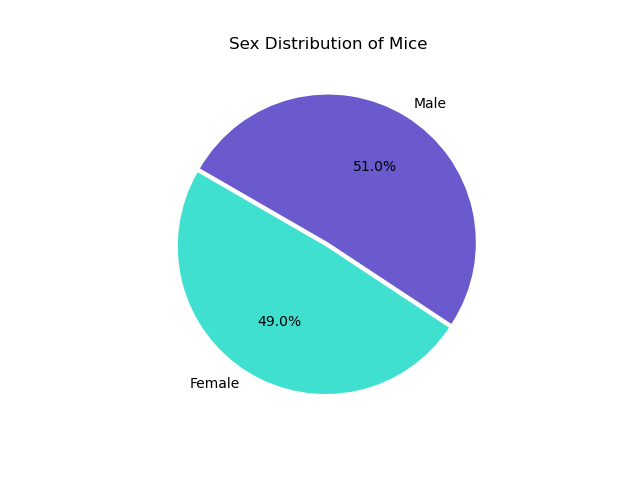

In [244]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# labels for each section of pie chart
labels = sex_count_df_renamed.index

# values of each section
sizes = sex_count_df_renamed['Number of Mice']

# colors
colors = ['turquoise', 'slateblue']

# explode
explode = [0.03, 0]


plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", startangle=150)
plt.title('Sex Distribution of Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [403]:
merged_df_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Final Tumor Vol,Final Tumor Volume
0,k403,Ramicane,Male,21,16,0,45.000000,0,NaN,NaN
1,k403,Ramicane,Male,21,16,5,38.825898,0,NaN,NaN
2,k403,Ramicane,Male,21,16,10,35.014271,1,NaN,NaN
3,k403,Ramicane,Male,21,16,15,34.223992,1,NaN,NaN
4,k403,Ramicane,Male,21,16,20,32.997729,1,NaN,NaN


In [404]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse

    # My orginal thinking was: pull only interested columns, then find where tumor volume is greatest
    # tumor_volume_df=merged_df_clean[['Mouse ID','Drug Regimen', 'Tumor Volume (mm3)']].groupby('Mouse ID').max('Tumor Volume(mm3)')

    # tumor_volume_df
    # # max_tumor_volume=tumor_volume_df['Tumor Volume (mm3)'].max()
    # # tumor_volume_df["Max Tumor Volume (mm3)"]=max_tumor_volume

    # # tumor_volume_df

    # -> instead, we want to find the greatest timepoint for each mouse id, then pull tumor volume from that row for final tumor volume
final_tumor_df=merged_df_clean[['Mouse ID', 'Drug Regimen','Timepoint','Tumor Volume (mm3)']].groupby('Mouse ID')#.max('Timepoint)')
final_tumor_df.head(10)
# type(final_tumor_df)

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,k403,Ramicane,0,45.000000
1,k403,Ramicane,5,38.825898
2,k403,Ramicane,10,35.014271
3,k403,Ramicane,15,34.223992
4,k403,Ramicane,20,32.997729
...,...,...,...,...
1888,z969,Naftisol,25,63.145652
1889,z969,Naftisol,30,65.841013
1890,z969,Naftisol,35,69.176246
1891,z969,Naftisol,40,70.314904


In [405]:
final_tumor_volume=final_tumor_df['Tumor Volume (mm3)'].max('Timepoint')
final_tumor_volume

Mouse ID
a203    67.973419
a251    65.525743
a262    70.717621
a275    62.999356
a366    63.440686
          ...    
z435    48.710661
z578    45.000000
z581    62.754451
z795    65.741070
z969    73.867845
Name: Tumor Volume (mm3), Length: 248, dtype: float64

In [406]:
    
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
    # from final tumor df, pull tumor volume column as a new series -> final tumor volume, then add this as a column to orig df?    
# final_tumor_volume=final_tumor_df('Final Tumor Volume (mm3)')

# final_tumor_volume

# merged_df_clean['Final Tumor Vol']=final_tumor_volume
# merged_df_clean.loc[:, merged_df_clean['Final Volume']] = final_tumor_volume
# merged_df_clean.head()
# -> this did not work. return an error:
    # A value is trying to be set on a copy of a slice from a DataFrame.
    # Try using .loc[row_indexer,col_indexer] = value instead

In [407]:
final_tumor_df["Final Tumor Volume"] = final_tumor_volume
final_tumor_df

TypeError: 'DataFrameGroupBy' object does not support item assignment

In [408]:
# this got rid of the slicing error, but it's giving me null values for final tumor volume. 
# something to do with the fact that the values come from groupby object? 
merged_df.loc[filter_2, "Final Tumor Volume"] = final_tumor_volume
final_tumor_df=merged_df.loc[filter_2, :]
final_tumor_df.groupby('Mouse ID').head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Final Tumor Volume
0,k403,Ramicane,Male,21,16,0,45.000000,0,NaN
1,k403,Ramicane,Male,21,16,5,38.825898,0,NaN
2,k403,Ramicane,Male,21,16,10,35.014271,1,NaN
3,k403,Ramicane,Male,21,16,15,34.223992,1,NaN
4,k403,Ramicane,Male,21,16,20,32.997729,1,NaN
...,...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,0,45.000000,0,NaN
1884,z969,Naftisol,Male,9,30,5,49.332999,0,NaN
1885,z969,Naftisol,Male,9,30,10,52.656081,1,NaN
1886,z969,Naftisol,Male,9,30,15,54.713005,2,NaN


In [415]:
# instead of merging with the old df, what if i create a new df with mouse id, drug regimen, and final tumor volume?
mouse_id=merged_df.loc[filter_2, 'Mouse ID'].unique()
drug_regimen=merged_df.loc[filter_2, 'Drug Regimen']

1880

In [362]:
# new_columns={
#     "Final Tumor Volume":final_tumor_volume
# }

# final_tumor_df_2=final_tumor_df.rename(columns=new_columns)
# final_tumor_df_2.head(15)

In [278]:
# used the below filter to check if I was pulling the correct values ->change == value to see info on different mouse
# id_filter=merged_df_clean['Mouse ID']=='a457'
# merged_df_clean.loc[id_filter, :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
511,a457,Ketapril,Female,11,30,0,45.000000,0
512,a457,Ketapril,Female,11,30,5,47.462891,0
513,a457,Ketapril,Female,11,30,10,49.783419,0


In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
